In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

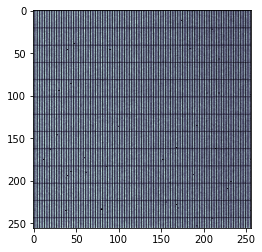

In [2]:
images = []

"""
names = ["Raw_tubo1_sangre_m1s32.txt", "Raw_tubo1_sangre_m2s32.txt", "Raw_tubo1_sangre_m3s32.txt", "Raw_tubo1_sangre_m4s32.txt", "Raw_tubo1_sangre_m5s32.txt",
"Raw_tubo1_sangre_m6s32.txt", "Raw_tubo1_sangre_m7s32.txt", "Raw_tubo1_sangre_m8s32.txt", "Raw_tubo1_sangre_m9s32.txt", "Raw_tubo1_sangre_m10s32.txt", "Raw_tubo1_sangre.txt", "Raw_tubo1_sangre_p1s32.txt",
"Raw_tubo1_sangre_p2s32.txt", "Raw_tubo1_sangre_p3s32.txt", "Raw_tubo1_sangre_p4s32.txt", "Raw_tubo1_sangre_p5s32.txt", "Raw_tubo1_sangre_p6s32.txt", "Raw_tubo1_sangre_p7s32.txt",
"Raw_tubo1_sangre_p8s32.txt", "Raw_tubo1_sangre_p9s32.txt", "Raw_tubo1_sangre_p10s32.txt"]
""""1. RAW"

names = ["Raw_tubo1_sangrem1.txt", "Raw_tubo1_sangrem2.txt", "Raw_tubo1_sangrem3.txt", "Raw_tubo1_sangrem4.txt", "Raw_tubo1_sangrem5.txt",
"Raw_tubo1_sangrem6.txt", "Raw_tubo1_sangre.txt", "Raw_tubo1_sangrep1.txt", "Raw_tubo1_sangrep2.txt", "Raw_tubo1_sangrep3.txt", "Raw_tubo1_sangrep4.txt", "Raw_tubo1_sangrep5.txt",
"Raw_tubo1_sangrep6.txt"]

for name in names:
    #img = np.rot90(np.genfromtxt("1. RAW/"+ name),1)
    img = np.rot90(np.genfromtxt("1. RAW10snoM/"+ name),1)
    images.append(img)

images = np.array(images)
plt.imshow(images[3], cmap="bone")

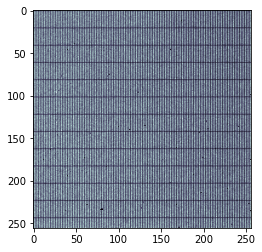

In [3]:
plt.imshow(images[8], cmap="bone")

In [4]:
for img in images: 
    mean = np.mean(img)
    for i in range(256):
        for j in range(256):
            if img[i,j] == 0:
                img[i,j] = mean

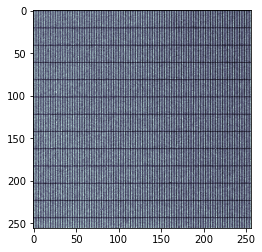

In [5]:
plt.imshow(images[8], cmap="bone")

In [6]:
def profile_pixel(images,i,j):
    points = []
    for image in images:
        points.append(image[i,j])
    return points

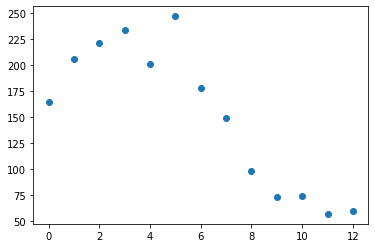

In [7]:
plt.plot(profile_pixel(images,0,0), "o")

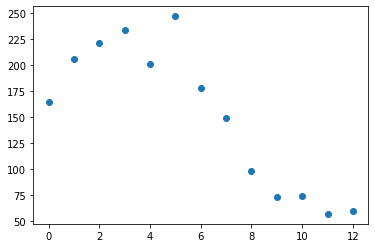

In [8]:
ilum_curves_nosample = []

for i in range(256):
    for j in range(256):
        ilum_curves_nosample.append(profile_pixel(images,i,j))

ilum_curves_nosample = np.array(ilum_curves_nosample)
ilum_curves_nosample = ilum_curves_nosample.reshape((256,256,len(names)))

plt.plot(ilum_curves_nosample[0,0], "o")

In [9]:
def func(x, a, b, c):
    return a*np.sin((2*np.pi/16)*x + b) + c

def fit(ilum_curves,i,j):
    xdata = np.arange(len(names))
    ydata = ilum_curves[i,j]
    popt, pcov = curve_fit(func, xdata, ydata)
    #xdata_n = np.linspace(0,13,1000)
    #plt.plot(xdata_n, func(xdata_n, *popt), 'g--', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
    #plt.plot(xdata, ydata, "o")
    return popt

In [10]:
datos_fits = []

for i in range(256):
    for j in range(256):
        datos_fits.append(fit(ilum_curves_nosample,i,j))

datos_fits = np.array(datos_fits)
datos_fits = datos_fits.reshape((256,256,3)) # numero de parametros de ajuste = 3


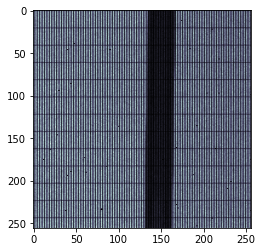

In [11]:
images_sample = []
for name in names:
    #img = np.rot90(np.genfromtxt("1. RAW/"+ name),1)
    img = np.rot90(np.genfromtxt("1. RAW10sM/"+ name),1)
    images_sample.append(img)

images_sample = np.array(images_sample)
plt.imshow(images_sample[3], cmap="bone")

In [12]:
for img in images_sample: 
    mean = np.mean(img)
    for i in range(256):
        for j in range(256):
            if img[i,j] == 0:
                img[i,j] = mean

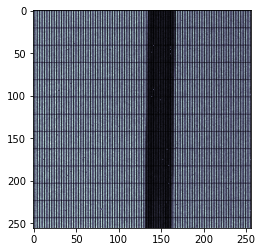

In [13]:
plt.imshow(images_sample[3], cmap="bone")

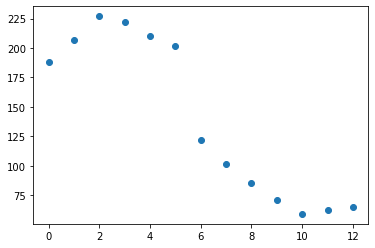

In [14]:
ilum_curves_sample = []

for i in range(256):
    for j in range(256):
        ilum_curves_sample.append(profile_pixel(images_sample,i,j))

ilum_curves_sample = np.array(ilum_curves_sample)
ilum_curves_sample = ilum_curves_sample.reshape((256,256,len(names)))

plt.plot(ilum_curves_sample[0,0], "o")

In [15]:
datos_fits_s = []

for i in range(256):
    for j in range(256):
        datos_fits_s.append(fit(ilum_curves_sample,i,j))

datos_fits_s = np.array(datos_fits_s)
datos_fits_s = datos_fits_s.reshape((256,256,3)) # numero de parametros de ajuste = 3

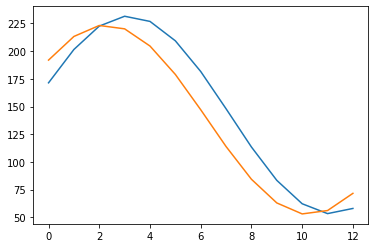

In [16]:
xdata = np.arange(len(names))

plt.plot(xdata, func(xdata, *datos_fits[0,0,:]))
plt.plot(xdata, func(xdata, *datos_fits_s[0,0,:]))

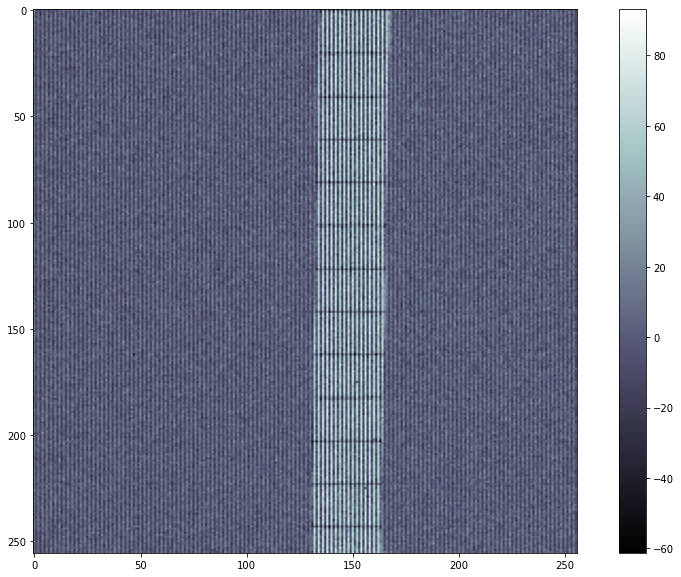

In [17]:
plt.figure(figsize=(15,10))
phase_tot = datos_fits_s[:,:,1] - datos_fits[:,:,1]
plt.imshow(phase_tot, cmap="bone")
plt.colorbar()

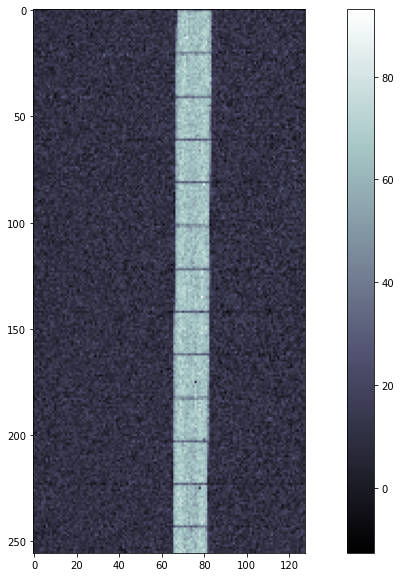

In [18]:
plt.figure(figsize=(15,10))
phase_negative = datos_fits_s[:,::2,1] - datos_fits[:,::2,1]
plt.imshow(phase_negative, cmap="bone")
plt.colorbar()

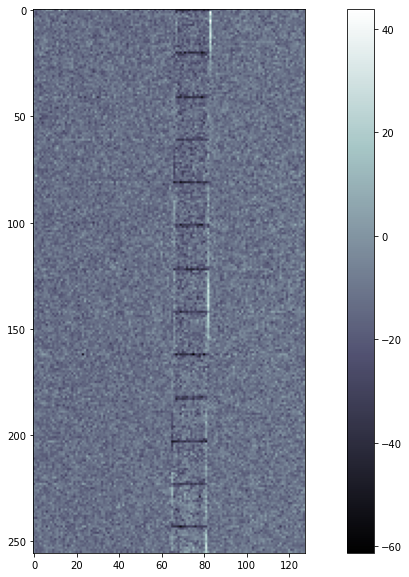

In [19]:
plt.figure(figsize=(15,10))
phase_positive = datos_fits_s[:,1::2,1] - datos_fits[:,1::2,1]
plt.imshow(phase_positive, cmap="bone")
plt.colorbar()

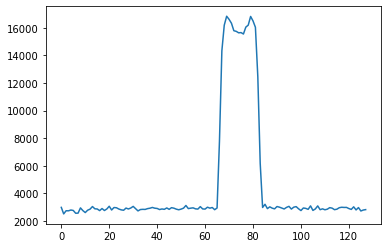

In [20]:
perfiles = phase_negative[0,:]
for i in range(1,256): 
    perfiles += phase_negative[i,:]

plt.plot(perfiles)

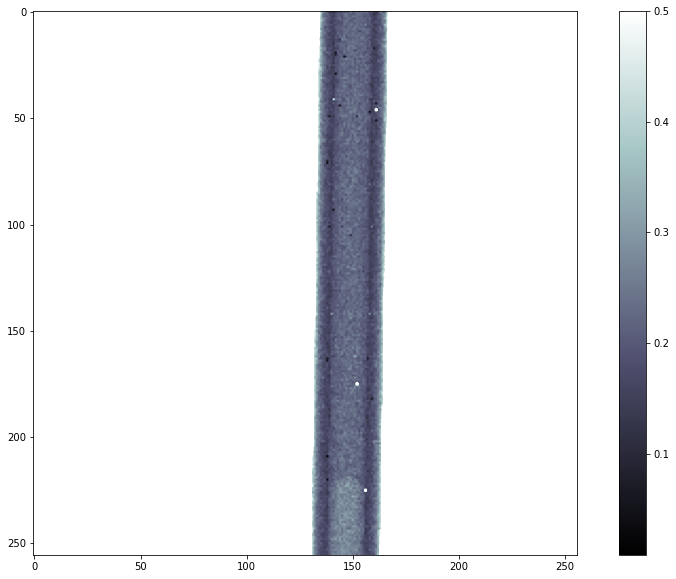

In [21]:
plt.figure(figsize=(15,10))
att = np.abs(datos_fits_s[:,:,0]/datos_fits[:,:,0])
plt.imshow(att, cmap="bone", vmax=0.5)
plt.colorbar()

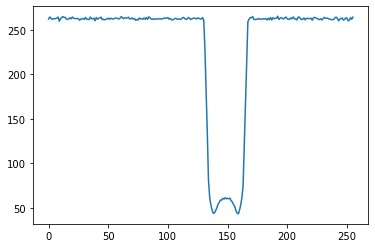

In [22]:
perfilesatt = att[0,:]
for i in range(1,256): 
    perfilesatt += att[i,:]

plt.plot(perfilesatt)

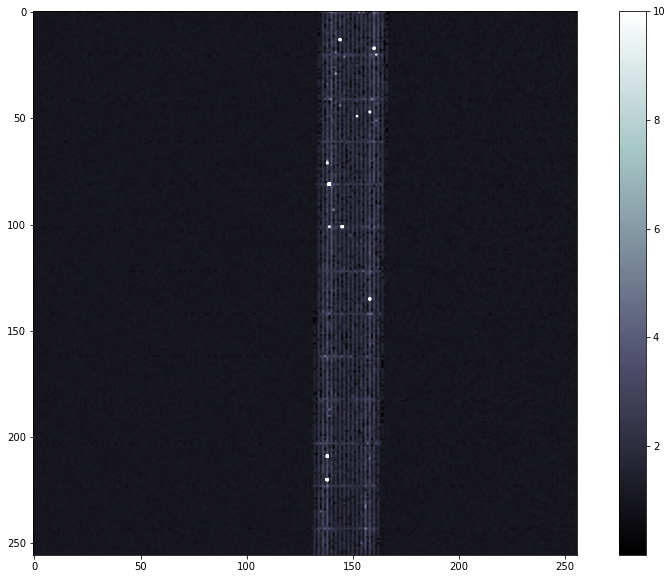

In [25]:
plt.figure(figsize=(15,10))
dark = np.abs(datos_fits_s[:,:,0]-datos_fits[:,:,1])/np.abs(datos_fits_s[:,:,0]-datos_fits_s[:,:,1])
plt.imshow(dark, cmap="bone", vmax=10)
plt.colorbar()